# All Imports

In [1]:
import pycaret
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

# Import dataset from Kaggle

In [2]:
df = pd.read_csv('MBA.csv')
df['admission'].fillna('reject', inplace=True)

,Description,Value
0,Session id,283
1,Target,admission
2,Target type,Multiclass
3,Target mapping,"Admit: 0, Waitlist: 1, reject: 2"
4,Original data shape,"(6194, 10)"
5,Transformed data shape,"(6194, 29)"
6,Transformed train set shape,"(4335, 29)"
7,Transformed test set shape,"(1859, 29)"
8,Numeric features,4
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8574,0.0000,0.8574,0.8306,0.8278,0.3017,0.3450,0.3770
rf,Random Forest Classifier,0.8524,0.8854,0.8524,0.8188,0.8217,0.2794,0.3180,0.1790
lightgbm,Light Gradient Boosting Machine,0.8494,0.8891,0.8494,0.8299,0.8329,0.3493,0.3637,1.3070
et,Extra Trees Classifier,0.8466,0.8452,0.8466,0.8113,0.8168,0.2622,0.2952,0.2480
ridge,Ridge Classifier,0.8411,0.0000,0.8411,0.7868,0.7777,0.0590,0.1225,0.0470
dummy,Dummy Classifier,0.8385,0.5000,0.8385,0.7031,0.7649,0.0000,0.0000,0.0670
lr,Logistic Regression,0.8362,0.0000,0.8362,0.7804,0.7858,0.1052,0.1506,0.6950
lda,Linear Discriminant Analysis,0.8348,0.0000,0.8348,0.7839,0.7968,0.1675,0.1983,0.0460
ada,Ada Boost Classifier,0.8263,0.0000,0.8263,0.7867,0.8011,0.2121,0.2273,0.0960
dt,Decision Tree Classifier,0.8228,0.6959,0.8228,0.8259,0.8240,0.3636,0.3643,0.0510


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# Run the initial setup using the Functional APIs

In [9]:
initial_setup = setup(df, target = 'admission')
best_fit_model = compare_models()

,Description,Value
0,Session id,8293
1,Target,admission
2,Target type,Multiclass
3,Target mapping,"Admit: 0, Waitlist: 1, reject: 2"
4,Original data shape,"(6194, 10)"
5,Transformed data shape,"(6194, 29)"
6,Transformed train set shape,"(4335, 29)"
7,Transformed test set shape,"(1859, 29)"
8,Numeric features,4
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8531,0.0000,0.8531,0.8198,0.8216,0.2767,0.3179,0.2850
rf,Random Forest Classifier,0.8526,0.8936,0.8526,0.8156,0.8208,0.2749,0.3161,0.1250
et,Extra Trees Classifier,0.8514,0.8577,0.8514,0.8161,0.8217,0.2831,0.3196,0.1150
ridge,Ridge Classifier,0.8401,0.0000,0.8401,0.7911,0.7782,0.0609,0.1254,0.0390
lightgbm,Light Gradient Boosting Machine,0.8385,0.8872,0.8385,0.8137,0.8220,0.3115,0.3224,0.5230
dummy,Dummy Classifier,0.8385,0.5000,0.8385,0.7031,0.7649,0.0000,0.0000,0.0350
lr,Logistic Regression,0.8378,0.0000,0.8378,0.7836,0.7874,0.1106,0.1608,0.7110
lda,Linear Discriminant Analysis,0.8339,0.0000,0.8339,0.7854,0.7992,0.1826,0.2098,0.0380
ada,Ada Boost Classifier,0.8323,0.0000,0.8323,0.7969,0.8097,0.2529,0.2678,0.0790
svm,SVM - Linear Kernel,0.8244,0.0000,0.8244,0.7306,0.7688,0.0441,0.0559,0.0560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# Analyse

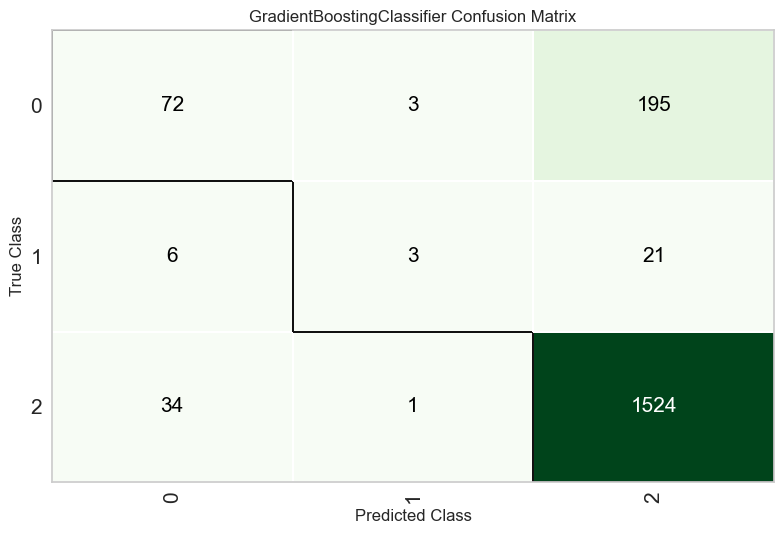

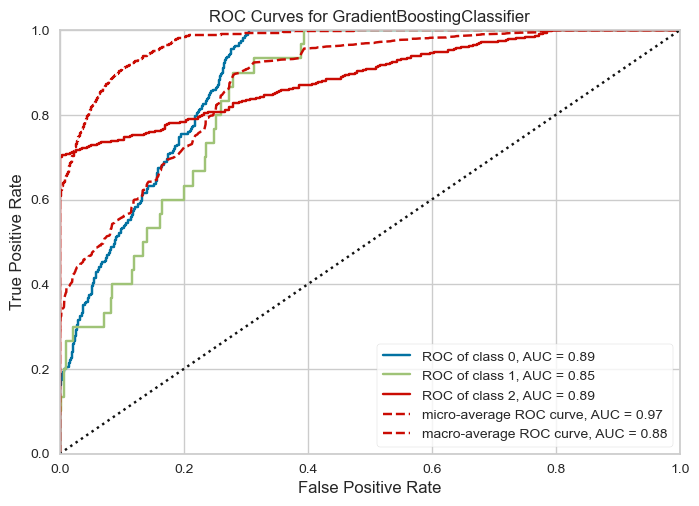

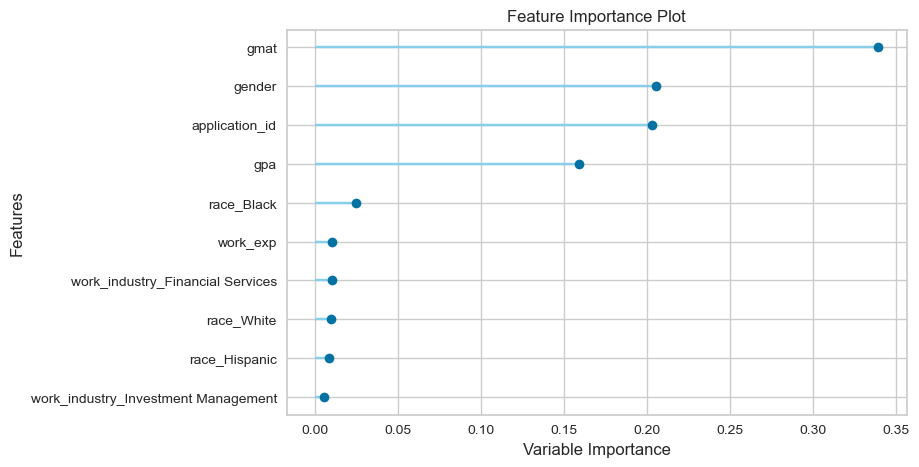

In [3]:
plot_model(best_fit_model, plot = 'confusion_matrix')
plot_model(best_fit_model, plot = 'auc')
plot_model(best_fit_model, plot = 'feature')

# Evaluate the best model and use it for prediction

In [10]:
evaluate_model(best_fit_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [5]:
holdout_pred = predict_model(best_fit_model)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8601,0.8898,0.8601,0.8348,0.8322,0.3219,0.3648


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission,prediction_label,prediction_score
2356,2357,Female,False,2.97,Humanities,White,610.0,4.0,PE/VC,reject,reject,0.9962
540,541,Female,True,3.16,Humanities,NaN,690.0,4.0,Consulting,Admit,Admit,0.5023
2970,2971,Female,False,3.22,Humanities,Other,570.0,6.0,Financial Services,reject,reject,0.9953
4348,4349,Female,True,3.44,STEM,NaN,730.0,5.0,Financial Services,Admit,Admit,0.5098
3085,3086,Male,False,3.22,Business,White,680.0,5.0,PE/VC,Admit,reject,0.7240


In [7]:
predictions = predict_model(best_fit_model, data = df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8849,0.9316,0.8849,0.8805,0.8630,0.4451,0.5031


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission,prediction_label,prediction_score
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit,Admit,0.9207
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,reject,reject,0.8483
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit,Admit,0.9263
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,reject,reject,0.8675
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,reject,reject,0.9927


# Save the model

In [8]:
save_model(best_fit_model, 'Classification_MBA_admit')
loaded_classification_pipeline = load_model('Classification_MBA_admit')
loaded_classification_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Dell\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['application_id', 'gpa', 'gmat',
                                             'work_exp'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fil...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=283, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)